### Importing needed libaries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import torch
import matplotlib.pyplot as plt # data plotting
import os

### Load data

In [2]:
!wget --no-check-certificate 'https://www.dropbox.com/scl/fi/yd44nmfz1nh9xwwxdpf57/pb2_train.npz?rlkey=giclr1yni4h528pc9mtpf00si&dl=0' -O ./data_train.npz

--2024-03-01 08:50:54--  https://www.dropbox.com/scl/fi/yd44nmfz1nh9xwwxdpf57/pb2_train.npz?rlkey=giclr1yni4h528pc9mtpf00si&dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ucfca016bcd828d64b197e4d9f43.dl.dropboxusercontent.com/cd/0/inline/COTFN7pYesJ0a0C_EWXy_CLsStWnLHMhQK2FmIoyGNh3xl7uAx1JvaxFH9B4Z7-8ZK7cJXyTFSJgw4hafEiWNDvEeJkdga9ZZENb5_oF4Q8EKTO-F8mATeL8_-t5Bd_3bo5U6wSXNcavcNuUu6fiRFxo/file# [following]
--2024-03-01 08:50:57--  https://ucfca016bcd828d64b197e4d9f43.dl.dropboxusercontent.com/cd/0/inline/COTFN7pYesJ0a0C_EWXy_CLsStWnLHMhQK2FmIoyGNh3xl7uAx1JvaxFH9B4Z7-8ZK7cJXyTFSJgw4hafEiWNDvEeJkdga9ZZENb5_oF4Q8EKTO-F8mATeL8_-t5Bd_3bo5U6wSXNcavcNuUu6fiRFxo/file
Resolving ucfca016bcd828d64b197e4d9f43.dl.dropboxusercontent.com (ucfca016bcd828d64b197e4d9f43.dl.dropboxusercontent.com)... 162.125.65.1

In [3]:
train_x = np.load('./data_train.npz')['x']
train_label = np.load('./data_train.npz')['y']
print(train_x.shape, train_label.shape)

(48000, 28, 28) (48000,)


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

# Set GPU
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [6]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))])

In [7]:
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True)

100%|██████████| 26421880/26421880 [00:02<00:00, 11844552.20it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 200331.88it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3721067.80it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 19452501.79it/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [8]:
testset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False)

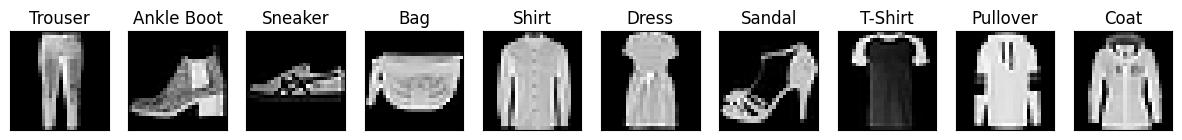

In [11]:
n_samples_show = 10
labels_map = {0: 'T-Shirt', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat',
              5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle Boot'}

data_iter = iter(trainloader)
fig, axes = plt.subplots(nrows=1, ncols=n_samples_show, figsize=(15, 7))

encountered_classes = [False] * len(labels_map)

while n_samples_show > 0:

    images, targets = data_iter.__next__()

    class_idx = targets[0].item()
    if not encountered_classes[class_idx]:
      axes[n_samples_show - 1].imshow(images[0, 0].numpy().squeeze(), cmap="gray")
      axes[n_samples_show - 1].set_xticks([])
      axes[n_samples_show - 1].set_yticks([])
      axes[n_samples_show - 1].set_title("{}".format(labels_map[targets[0].item()]))
      encountered_classes[class_idx] = True
      n_samples_show -= 1

    if all(encountered_classes):
        break

# Neural Network Model

In [ ]:
class FashionNN(nn.Module):
    def __init__(self):
        super(FashionNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)  # Flatten the image
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 10)  # 10 classes

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the image
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x


In [ ]:
## Now creating an instance should work and the optimizer should find parameters
net = FashionNN()

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

### Training

In [ ]:
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 200 == 199:    # print every 200 mini-batches
            print(f'[{epoch + 1}, {i + 1}] loss: {running_loss / 200:.3f}')
            running_loss = 0.0

print('Finished Training')


[1, 200] loss: 0.427
[1, 400] loss: 0.428
[1, 600] loss: 0.447
[1, 800] loss: 0.428
[2, 200] loss: 0.427
[2, 400] loss: 0.411
[2, 600] loss: 0.427
[2, 800] loss: 0.421
[3, 200] loss: 0.414
[3, 400] loss: 0.409
[3, 600] loss: 0.406
[3, 800] loss: 0.401
[4, 200] loss: 0.398
[4, 400] loss: 0.403
[4, 600] loss: 0.404
[4, 800] loss: 0.403
[5, 200] loss: 0.397
[5, 400] loss: 0.386
[5, 600] loss: 0.387
[5, 800] loss: 0.393
[6, 200] loss: 0.387
[6, 400] loss: 0.385
[6, 600] loss: 0.386
[6, 800] loss: 0.387
[7, 200] loss: 0.376
[7, 400] loss: 0.382
[7, 600] loss: 0.361
[7, 800] loss: 0.379
[8, 200] loss: 0.364
[8, 400] loss: 0.373
[8, 600] loss: 0.362
[8, 800] loss: 0.373
[9, 200] loss: 0.369
[9, 400] loss: 0.366
[9, 600] loss: 0.362
[9, 800] loss: 0.352
[10, 200] loss: 0.353
[10, 400] loss: 0.365
[10, 600] loss: 0.354
[10, 800] loss: 0.366
Finished Training


### Validating

In [ ]:
def evaluate_accuracy(model, dataloader):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in dataloader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return correct / total

In [ ]:
print(f'Accuracy of the network on the 10000 test images: {evaluate_accuracy(net, testloader) * 100} %')


Accuracy of the network on the 10000 test images: 85.39 %


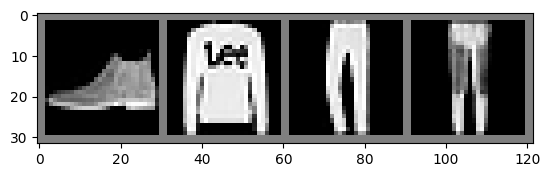

Predicted: Ankle boot, Pullover, Trouser, Trouser


In [ ]:
# Function to show an image
def imshow(img):
    img = img * 0.5 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(testloader)
images, labels = next(dataiter)

# Display images
imshow(torchvision.utils.make_grid(images[:4]))
outputs = net(images[:4])

_, predicted = torch.max(outputs, 1)

predicted_labels = [class_names[predicted[j]] for j in range(4)]
print('Predicted:', ', '.join(predicted_labels))


# We can do even better

#### Final Model Architecture - Adding dropout and more nodes

In [ ]:
class FashionNN2(nn.Module):
    def __init__(self):
        super(FashionNN2, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 1024)
        self.dropout1 = nn.Dropout(0.2)
        self.fc2 = nn.Linear(1024, 256)
        self.dropout2 = nn.Dropout(0.2)
        self.fc3 = nn.Linear(256, 128)
        self.dropout3 = nn.Dropout(0.2)
        self.fc4 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = F.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.fc4(x)
        return x

net = FashionNN2()


### Hyperparameter tuning

Finished Training using LR = 0.3 and Momentum = 0.9
Finished Training using LR = 0.3 and Momentum = 0.8
Finished Training using LR = 0.3 and Momentum = 0.5
Finished Training using LR = 0.03 and Momentum = 0.9
Finished Training using LR = 0.03 and Momentum = 0.8
Finished Training using LR = 0.03 and Momentum = 0.5
Finished Training using LR = 0.003 and Momentum = 0.9
Finished Training using LR = 0.003 and Momentum = 0.8
Finished Training using LR = 0.003 and Momentum = 0.5


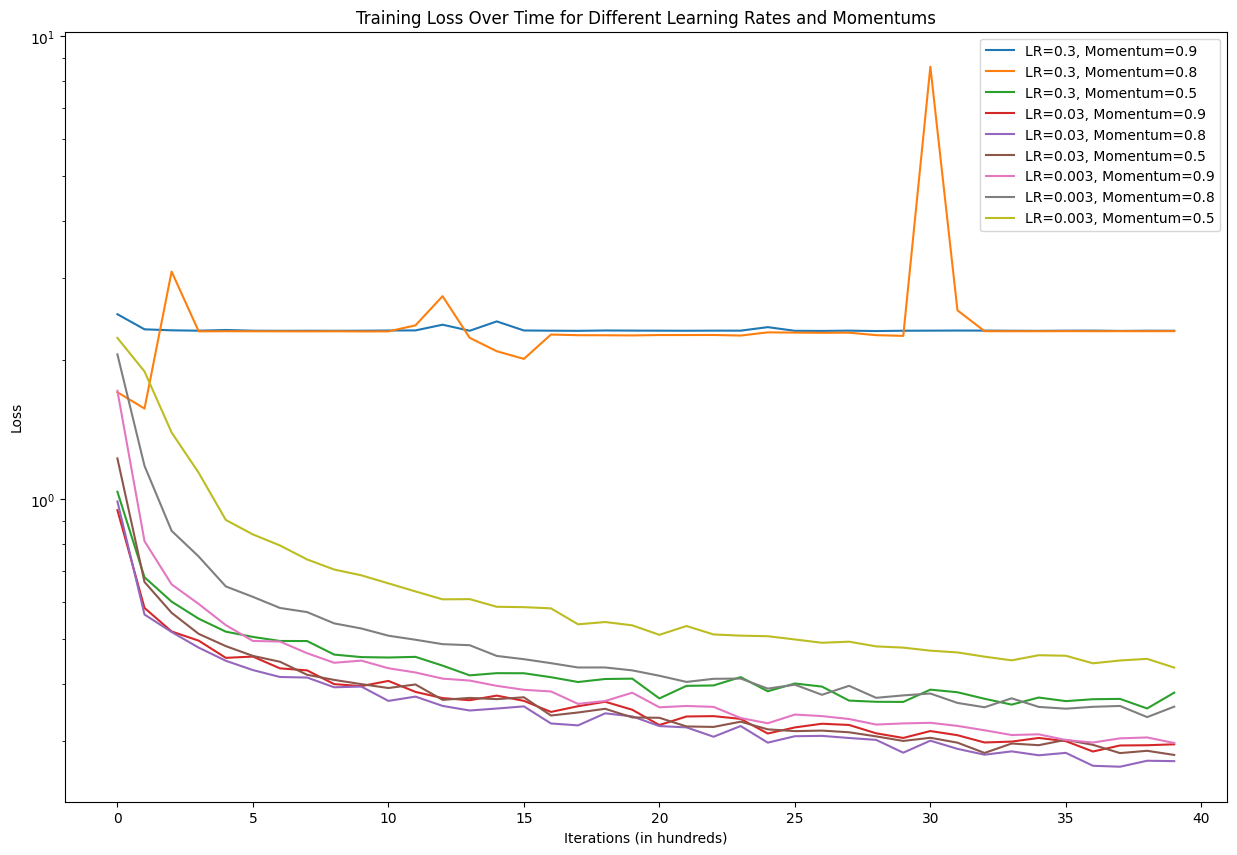

Best model accuracy: 87.56%


In [ ]:
best_model = None
best_accuracy = 0
loss_histories = {}
lrs = [0.3, 0.03, 0.003]
momentums = [0.9, 0.8, 0.5]

plt.figure(figsize=(15, 10))

for lr in lrs:
    for momentum in momentums:
        net = FashionNN2()  # Re-initialize the network for each set of hyperparameters
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.SGD(net.parameters(), lr=lr, momentum=momentum)
        num_epochs = 10
        loss_history = []

        for epoch in range(num_epochs):
            running_loss = 0.0
            for i, data in enumerate(trainloader, 0):
                inputs, labels = data
                optimizer.zero_grad()
                outputs = net(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                running_loss += loss.item()
                if i % 200 == 199:  # log every 200 mini-batches
                    current_loss = running_loss / 200
                    loss_history.append(current_loss)
                    running_loss = 0.0

        print(f"Finished Training using LR = {lr} and Momentum = {momentum}")

        # Evaluate model accuracy on the test set
        accuracy = evaluate_accuracy(net, testloader)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = net

        # Save loss history for plotting
        loss_histories[f'LR={lr}, Momentum={momentum}'] = loss_history
        plt.plot(loss_history, label=f'LR={lr}, Momentum={momentum}')

plt.xlabel('Iterations (in hundreds)')
plt.ylabel('Loss')
plt.yscale('log')
plt.title('Training Loss Over Time for Different Learning Rates and Momentums')
plt.legend()
plt.show()

print(f'Best model accuracy: {best_accuracy*100:.2f}%')


### Save Model Weights Locally

In [ ]:
import os

path = 'best_model_weights.pth'
directory = os.path.dirname(path)
if directory and not os.path.exists(directory):
  os.makedirs(directory)

torch.save(net.state_dict(), path)
print(f'Model weights saved to {path}')

Model weights saved to best_model_weights.pth
